In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input, concatenate, add
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [2]:
# Fashion mnist 資料集
(X_train, y_train0), (X_test, y_test0) = datasets.fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

print('X_train.shape : ',X_train.shape)
print('X_test.shape : ',X_test.shape)

X_train.shape :  (60000, 784)
X_test.shape :  (10000, 784)


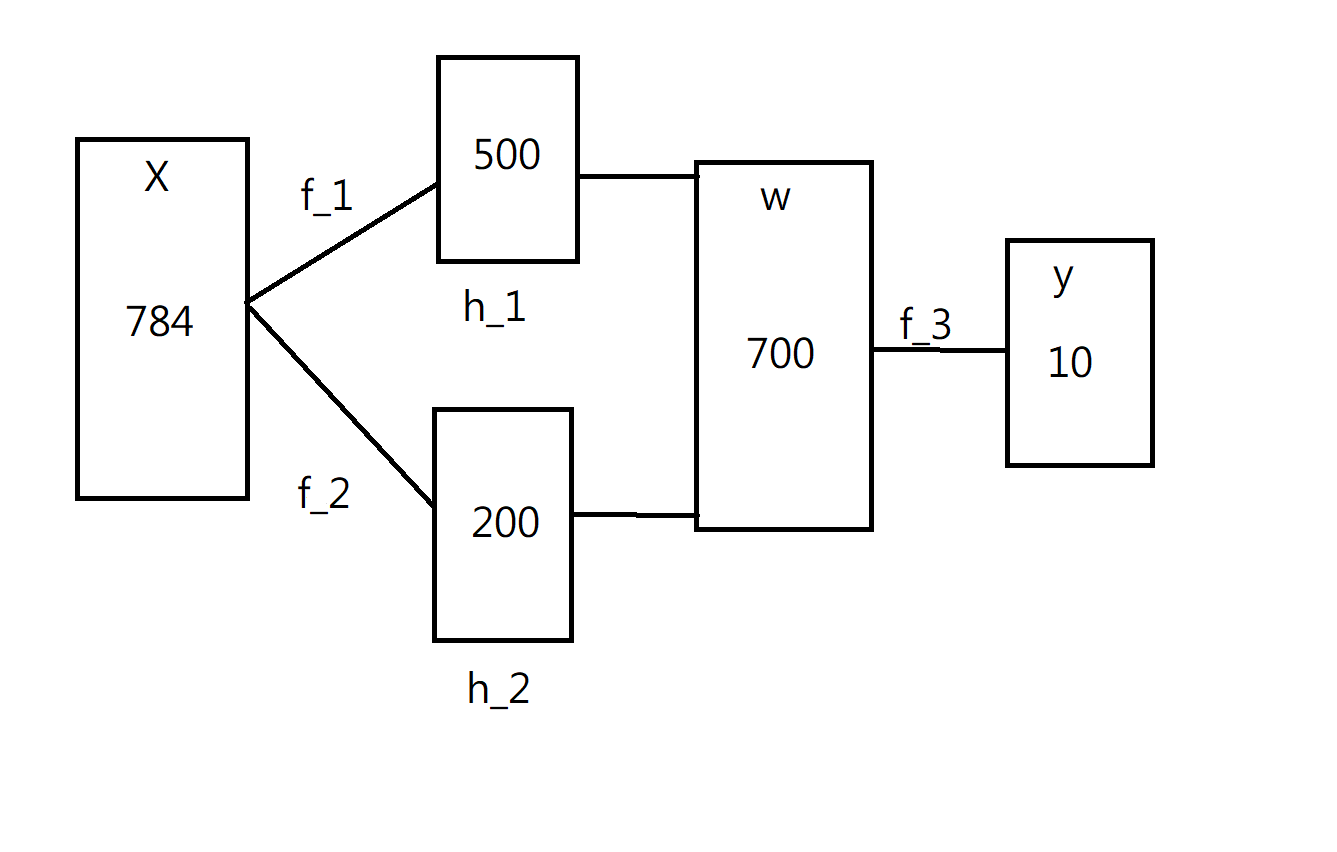

In [3]:
from IPython.display import Image
Image(filename="image.png")

In [4]:
# 模型建構
x = Input(shape=(784,))
f_1 = Dense(500, activation='relu')
f_2 = Dense(200, activation='sigmoid')
f_3 = Dense(10,activation='softmax')

In [5]:
h_1 = f_1(x)
h_2 = f_2(x)
w = concatenate([h_1, h_2])
y = f_3(w)

In [6]:
model = Model(x,y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 200)          157000      input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 700)          0           dense[0][0]                      
                                                                 dense_1[0][0]                

In [7]:
model.compile(loss='mse', optimizer=Adam(), metrics=['accuracy'])

In [8]:
# 訓練模型
model.fit(X_train, y_train, batch_size=512, epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0304 - accuracy: 0.7868
Epoch 2/8
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0214 - accuracy: 0.8553
Epoch 3/8
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0196 - accuracy: 0.8675
Epoch 4/8
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0183 - accuracy: 0.8766s - los
Epoch 5/8
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0173 - accuracy: 0.8835
Epoch 6/8
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0168 - accuracy: 0.8853
Epoch 7/8
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0158 - accuracy: 0.8939
Epoch 8/8
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0154 - accuracy: 0.8977


In [10]:
# 預測結果
model.save_weights('MNIST_Model.h5')
score = model.evaluate(X_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

60000/60000 [==============================] - 3s 57us/sample - loss: 0.0148 - accuracy: 0.9006
Loss: 0.014849810705830654
準確率: 90.05666375160217
